
## Linear, translation-invariant (LTI) systems

Linearity and translation-invariance are like peanut butter and chocolate—the real magic happens when they come together.

To see why this happens, let's return to where we left off in the section on *linearity*. We had discovered that any linear system's reponse to an input can be decomposed into responses to individual shifted impulses; for example, for a discrete system $T: x \mapsto y$, this took the form of

$$ y(n) = \sum_{i=-\infty}^\infty x(i)\,h_i(n) $$

where

$$ h_i(n) = T(\delta(n-i))$$

gives the response by the system to a shifted impulse. Noting that we can express $\delta(n-i) = D_i \delta(n)$ in terms of the delay operator, what happens if we assume that $T$ is not only *linear*, but also *translation-invariant*? Intuitively, this should mean that all of these responses to a shifted impulses should be *the same response*, just shifted; symbolically, we can derive this by noting that

$$
\begin{eqnarray*}
    h_i(n) & = & T(\delta(n-i)) \\
     & = & T(D_i(\delta(n))) \\
     & = & D_i(T(\delta(n)))\textrm{ by translation-invariance}
\end{eqnarray*}
$$

So now we've discovered the true kernel of what makes a linear *and* translation-invariant (or **LTI**) system tick: their response to signals is *completely determined* by their response to a single impulse at the origin! Because of the importance of this function—called, unsurprisingly, the **impulse response**—we give it a special notation:

$$ h(n) = T(\delta(n)) $$

and note that this gives a common form to all of the Green's functions for a LTI system:

$$
\begin{eqnarray*}
    h_i(n) & = & D_i( h(n) ) \\
     & = & h(n-i)
\end{eqnarray*}
$$

That is, all of the Green's functions are translated versions of the same impulse response. Knowing this, we can return to our expression for the output of an LTI system, and rewrite it in terms of the *impulse response*:

$$
\begin{eqnarray*}
    y(n) & = & \sum_{i=-\infty}^\infty x(i)\,h_i(n) \\
     & = & \sum_{i=-\infty}^\infty x(i)\,h(n-i)
\end{eqnarray*}
$$

Now, recall from above our observation that *every signal* can be decomposed into scaled and shifted impulses:

$$ x(n) = \sum_{i=-\infty}^\infty x(i)\,\delta(n-i) $$

The form above is *very* similar; but now, we see that the output of an LTI system is decomposable into scaled and shifted *impulse responses*; that is, each shifted impulse in the original signal is transformed by the system into a shifted impulse *response*. This is, fundamentally, the action of an LTI system: to plop down an impulse response $h(n-i)$ at every input impulse $\delta(n-i)$, scaled appropriately.

The summations we saw above involving two signals of the form

$$ \sum_{i=-\infty}^\infty a(i)\,b(n - i) $$

are so fundamental to LTI system theory that we give them their own name: **convolution**. Note that in the convolution sum, there is a "free" variable, $n$ in this case; therefore, it stands to reason that the result of a convolution sum isn't just an individual value, but in fact, an entire *signal*. In convolution, the first input signal $a$ gives the *scale* factors (by analogy with $x(i)$ in the sums above) at each shift, while the second signal $b$ gives the *vector* that is shifted and scaled (like the shifted impulse response $h(n-i)$ above).

<a id="example_convolution"></a>
***

#### **Example**: Convolution

Above we dealt with a *simple moving average* system. Let's implement another averaging filter for data—but this time, let's use a different impulse response.

One relatively famous smoothing system is *Spencer's 15-point moving average*, which has the remarkable property that it leaves cubic polynomial inputs completely unaltered.

We can visualize the impulse response of this system:

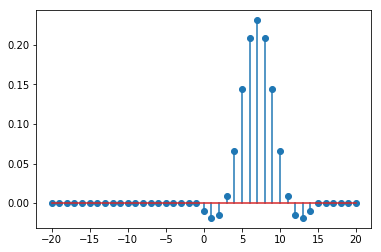

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

spencer_a = np.array( [ -3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 21, 3, -5, -6, -3] )

n_per_side = 20
n_all = np.arange( -n_per_side, n_per_side + 1 )
h = np.zeros( n_all.shape )
h[n_per_side:(n_per_side+spencer_a.shape[0])] = spencer_a / np.sum( spencer_a )

plt.stem( n_all, h )
plt.show()

Let's apply this system to some stock data by **convolving** the data with this impulse response. First, it's worth taking a second to illustrate what's going on with the convolution sum under the hood. As mentioned above, when we convolve two signals, as we do with the response to an LTI system:

$$ y(n) = \sum_{i=-\infty}^\infty x(i)\,h(n-i) $$

we use the second signal to give us the *vector* component, which determines the shape of the signal that is laid down at that step; and we use the first signal to give us the *scalar* component, which determines the amplitude of that applied signal vector. Let's illustrate this (by using every 5th sample, for clarity):

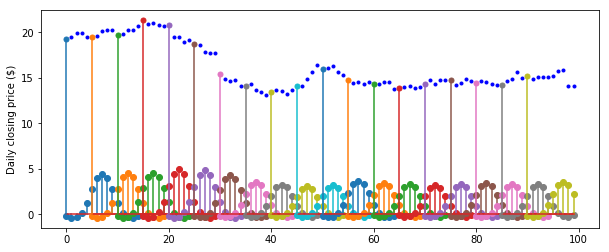

In [ ]:
import yfinance
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

cur_ticker = 'M'
ticker = yfinance.Ticker( cur_ticker )

ticker_history = ticker.history( period = '1y' )
ticker_close = ticker_history.loc[:, 'Close']

n_all = np.array( [ i for i, x in enumerate( ticker_close ) ] )

x = ticker_close

h = np.zeros( n_all.shape )
h[0:spencer_a.shape[0]] = spencer_a / np.sum( spencer_a )

n_look = 100

plt.figure( figsize = (10, 4) )
plt.plot( n_all[:n_look], x[:n_look], 'b.' )

for color_idx, i in enumerate( range( 0, n_look - 5, 5 ) ):
    hi = np.zeros( (n_look,) )
    hi[i:] = h[:(n_look - i)]
    plt.stem( n_all[:n_look][i:i+spencer_a.shape[0]], x[i] * hi[i:i+spencer_a.shape[0]],
              linefmt = 'C{0}-'.format( color_idx % 10 ),
              markerfmt = 'C{0}o'.format( color_idx % 10 ) )
    plt.plot( np.array( [i, i] ), np.array( [ hi[i], x[i] ] ), 'C{0}-'.format( color_idx % 10 ))
    plt.plot( np.array( [i] ), np.array( [x[i]] ), 'C{0}.'.format( color_idx % 10 ),
              markersize = 10 )
    
plt.ylabel( 'Daily closing price ($)' )
plt.show()

The stem plots at the bottom are what results at each sample: these are the scaled and shifted impulse responses for the correspondiing samples in the trace above them. These shifted and scaled impulse responses are then added together, yielding the final convolution result:

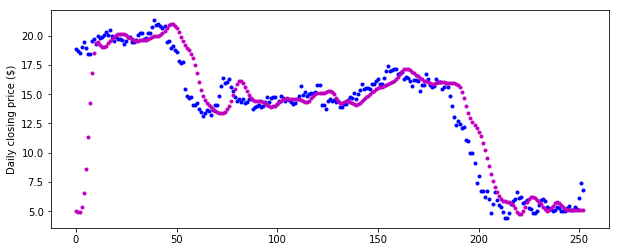

In [ ]:
import yfinance
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

cur_ticker = 'M'
ticker = yfinance.Ticker( cur_ticker )

ticker_history = ticker.history( period = '1y' )
ticker_close = ticker_history.loc[:, 'Close']

n_all = np.array( [ i for i, x in enumerate( ticker_close ) ] )

x = ticker_close

h = np.zeros( n_all.shape )
h[0:spencer_a.shape[0]] = spencer_a / np.sum( spencer_a )

# Manually perform convolution
y = np.zeros( n_all.shape )
for n_idx, n in enumerate( n_all ):
    cur_sum = 0.
    for i_idx, i in enumerate( n_all ):
        cur_sum += x[i_idx] * h[n_idx - i_idx]
    y[n_idx] = cur_sum

plt.figure( figsize = (10, 4) )
plt.plot( n_all, x, 'b.', label = 'Input' )
plt.plot( n_all, y, 'm.', label = 'Output' )
plt.ylabel( 'Daily closing price ($)' )
plt.show()

(Note that, once again, our system has an "edge effect" resulting from the fact that we treat our signals as padded with extra zeros on the sides; at the beginning of the signal, there are not enough time points to "fill up" the entire impulse response with data, and as such, an artifact ensues wherever there is a lack of data. We can ameliorate this problem by providing *initial conditioins* for our system, as we will see later on.)